<a href="https://colab.research.google.com/github/kundajelab/label_shift_experiments/blob/master/LabelShiftSlideFigures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


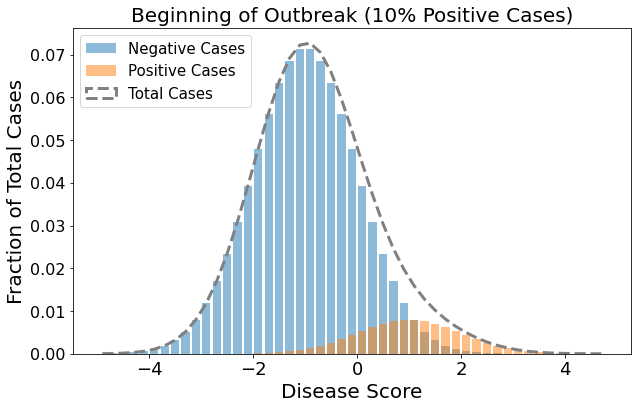

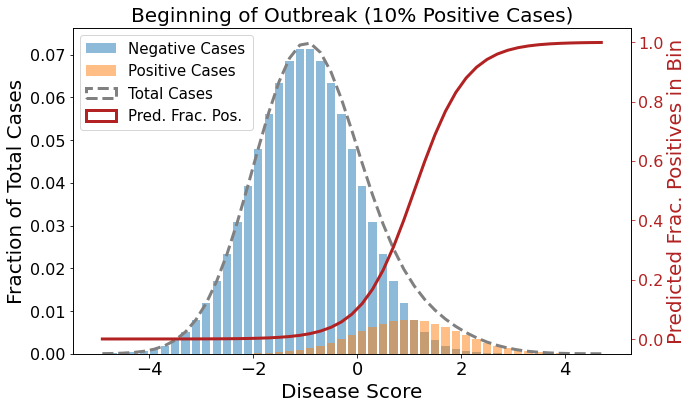

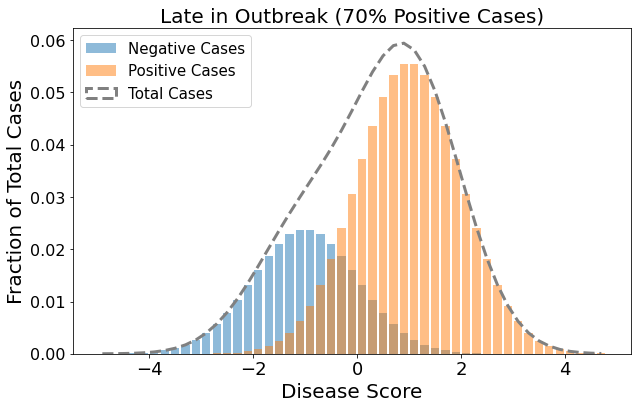

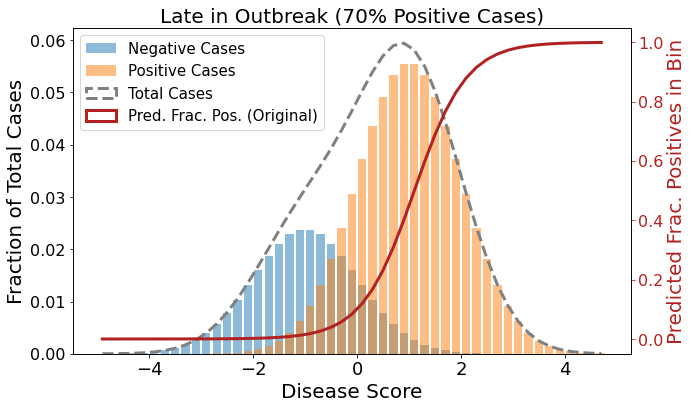

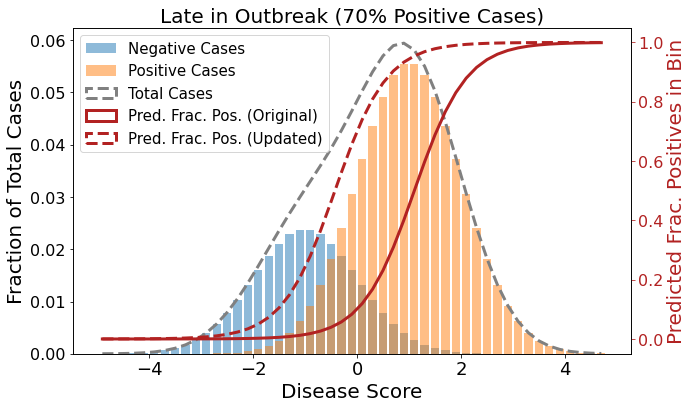

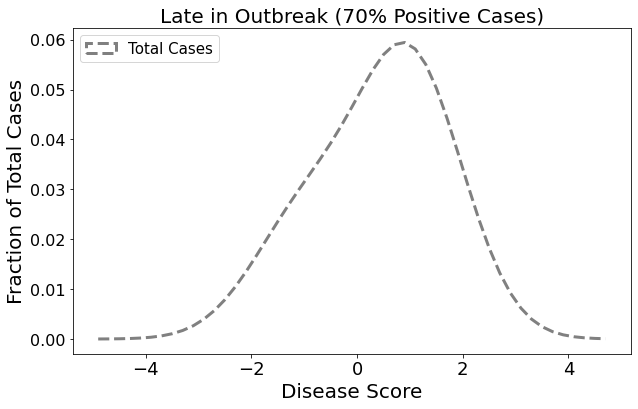

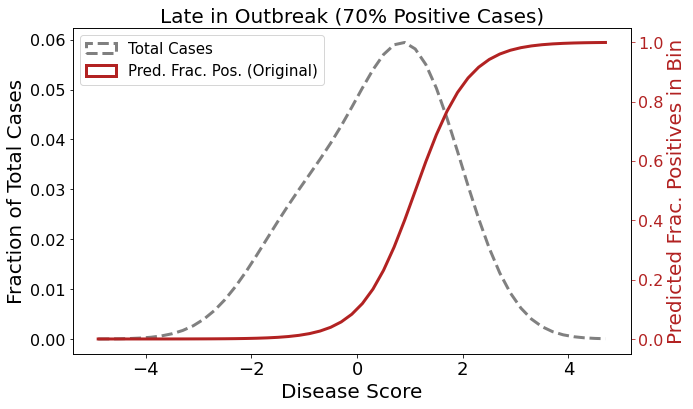

In [248]:
import matplotlib.patches as mpatches

font = {'weight' : 'normal'}
matplotlib.rc('font', **font)
TICKLABEL_SIZE=16
AXLABEL_SIZE=20
AX2_COLOR="firebrick"
TITLE_SIZE=20
LEGEND_FONTSIZE=15

ORIG_POS_FRAC = 0.1
LATE_POS_FRAC = 0.7
negdist = scipy.stats.norm(-1, 1)
posdist = scipy.stats.norm(1, 1)
BUCKET_WIDTH = 0.2
buckets = np.arange(-5, 5, bucket_width)
midpoints = (buckets[0:-1] + buckets[1:])/2
negcdfs = np.array([negdist.cdf(x) for x in buckets])
poscdfs = np.array([posdist.cdf(x) for x in buckets])
orig_negprobs = (negcdfs[1:] - negcdfs[:-1])*(1-ORIG_POS_FRAC)
orig_posprobs = (poscdfs[1:] - poscdfs[:-1])*ORIG_POS_FRAC
late_negprobs = (negcdfs[1:] - negcdfs[:-1])*(1-LATE_POS_FRAC)
late_posprobs = (poscdfs[1:] - poscdfs[:-1])*LATE_POS_FRAC

def barplot(ax, midpoints, probs, **kwargs):
  return ax.bar(midpoints, probs, width=BUCKET_WIDTH*0.8, alpha=0.5, **kwargs)

def lineplot(ax, x, y, linestyle="-", linewidth=3, **kwargs):
  ax.plot(x, y, linestyle=linestyle, linewidth=linewidth, **kwargs)
  #patch_kwargs = dict(kwargs.items())
  return mpatches.Patch(edgecolor=kwargs['color'],
                        facecolor="white", linestyle=linestyle,
                        linewidth=linewidth)

def fracposplot(ax, midpoints, posprobs, negprobs, **kwargs):
  return lineplot(ax=ax, x=midpoints, y=posprobs/(posprobs+negprobs),
                  color=AX2_COLOR, **kwargs)

def configure_ax1(ax):
  ax.tick_params(axis='y', labelsize=TICKLABEL_SIZE)
  ax.set_ylabel("Fraction of Total Cases", fontsize=AXLABEL_SIZE)
  ax.set_xlabel("Disease Score", fontsize=AXLABEL_SIZE)

def configure_ax2(ax):
  ax.tick_params(axis='y', colors=AX2_COLOR,
                labelsize=TICKLABEL_SIZE)
  ax.set_ylabel("Predicted Frac. Positives in Bin", color=AX2_COLOR,
               fontsize=AXLABEL_SIZE)
  
def early_title():
  plt.title("Beginning of Outbreak ("
             +str(int(ORIG_POS_FRAC*100))+"% Positive Cases)",
             fontsize=TITLE_SIZE)

def late_title():
  plt.title("Late in Outbreak ("
             +str(int(LATE_POS_FRAC*100))+"% Positive Cases)",
             fontsize=TITLE_SIZE)

fig, ax1 = plt.subplots(figsize=(10,6))
handles = []
handles.append(barplot(ax1, midpoints, orig_negprobs))
handles.append(barplot(ax1, midpoints, orig_posprobs))
handles.append(lineplot(ax1, midpoints, orig_negprobs+orig_posprobs,
                        color="grey", linestyle="--"))
configure_ax1(ax1)
plt.legend(handles, ["Negative Cases", "Positive Cases", "Total Cases"],
           fontsize=LEGEND_FONTSIZE, loc=2)
early_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(barplot(ax1, midpoints, orig_negprobs))
handles.append(barplot(ax1, midpoints, orig_posprobs))
handles.append(lineplot(ax1, midpoints, orig_negprobs+orig_posprobs,
                        color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs, orig_negprobs))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Negative Cases", "Positive Cases",
                     "Total Cases", "Pred. Frac. Pos. "],
           fontsize=LEGEND_FONTSIZE, loc=2)
early_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
handles = []
handles.append(barplot(ax1, midpoints, late_negprobs))
handles.append(barplot(ax1, midpoints, late_posprobs))
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                        color="grey", linestyle="--"))
configure_ax1(ax1)
plt.legend(handles, ["Negative Cases", "Positive Cases", "Total Cases"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(barplot(ax1, midpoints, late_negprobs))
handles.append(barplot(ax1, midpoints, late_posprobs))
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                        color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs, orig_negprobs))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Negative Cases", "Positive Cases",
                     "Total Cases",
                     "Pred. Frac. Pos. (Original)"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(barplot(ax1, midpoints, late_negprobs))
handles.append(barplot(ax1, midpoints, late_posprobs))
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                        color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs,
                           orig_negprobs))
handles.append(fracposplot(ax2, midpoints, late_posprobs,
                           late_negprobs, linestyle="--"))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Negative Cases", "Positive Cases",
                     "Total Cases",
                     "Pred. Frac. Pos. (Original)",
                     "Pred. Frac. Pos. (Updated)"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()


fig, ax1 = plt.subplots(figsize=(10,6))
handles = []
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                       color="grey", linestyle="--"))
configure_ax1(ax1)
plt.legend(handles, ["Total Cases"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()


fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
handles = []
handles.append(lineplot(ax1, midpoints, late_negprobs+late_posprobs,
                       color="grey", linestyle="--"))
handles.append(fracposplot(ax2, midpoints, orig_posprobs,
                           orig_negprobs))
configure_ax1(ax1)
configure_ax2(ax2)
plt.legend(handles, ["Total Cases",
                     "Pred. Frac. Pos. (Original)"],
           fontsize=LEGEND_FONTSIZE, loc=2)
late_title()
plt.show()

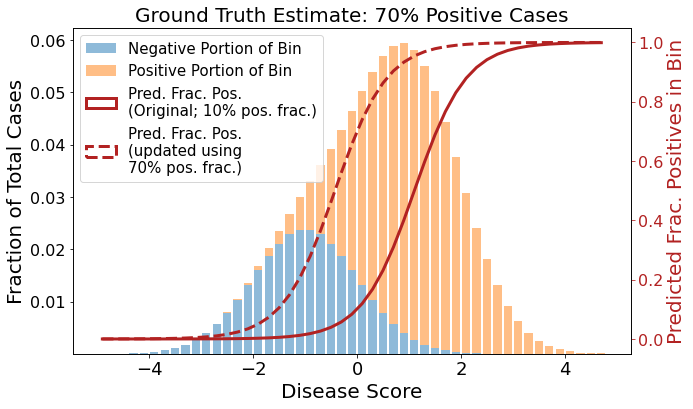

Iteraction 0 current posfrac: 0.1


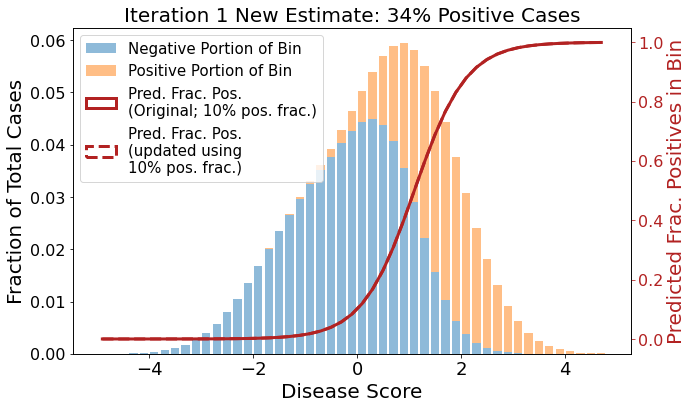

Iteraction 1 current posfrac: 0.3460571335949172


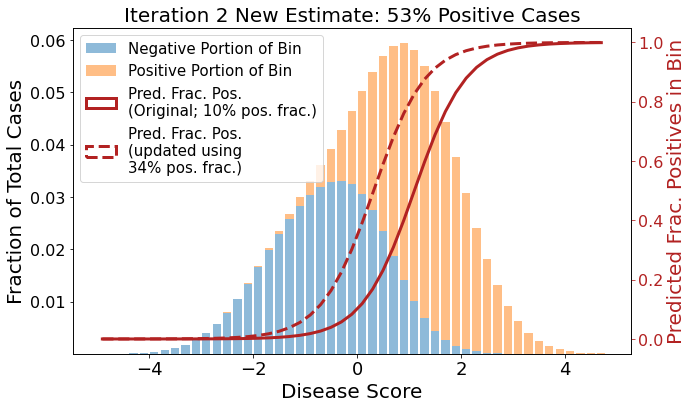

Iteraction 2 current posfrac: 0.5357610380766378


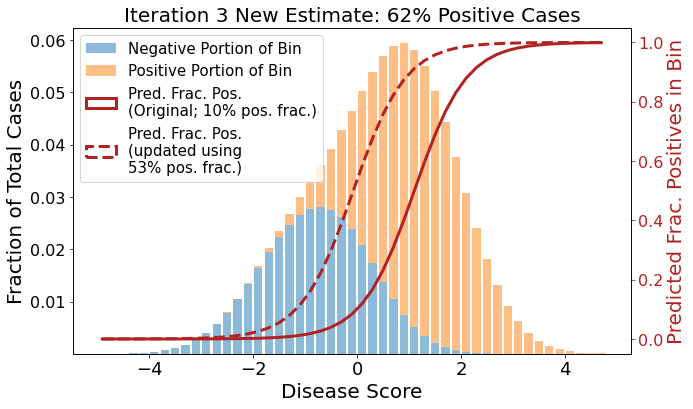

Iteraction 3 current posfrac: 0.625859988673438


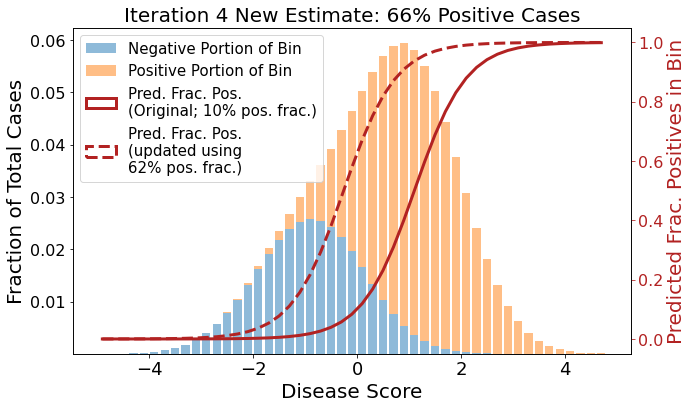

Iteraction 4 current posfrac: 0.6659297253294539


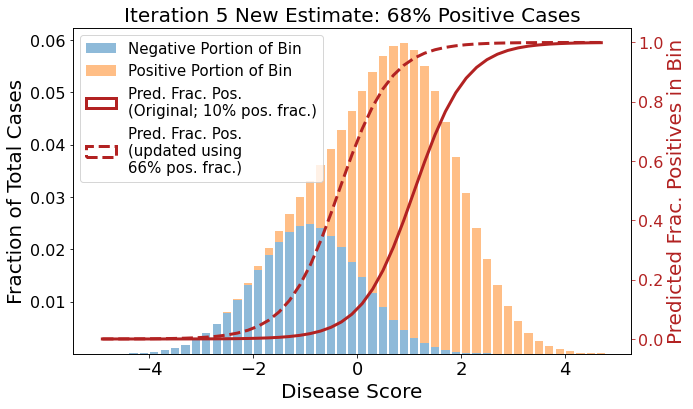

Iteraction 5 current posfrac: 0.6841045164988498


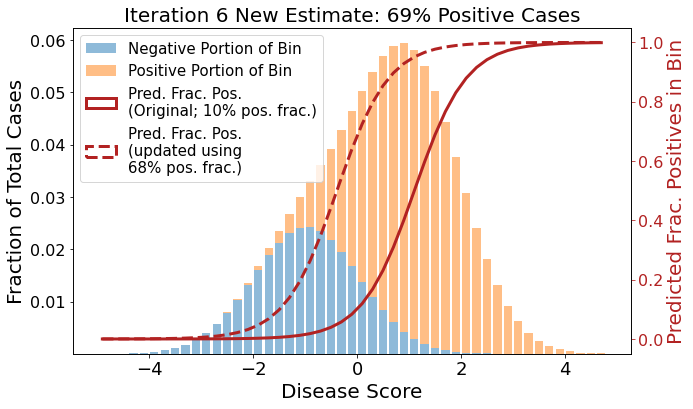

Iteraction 6 current posfrac: 0.6925173220908117


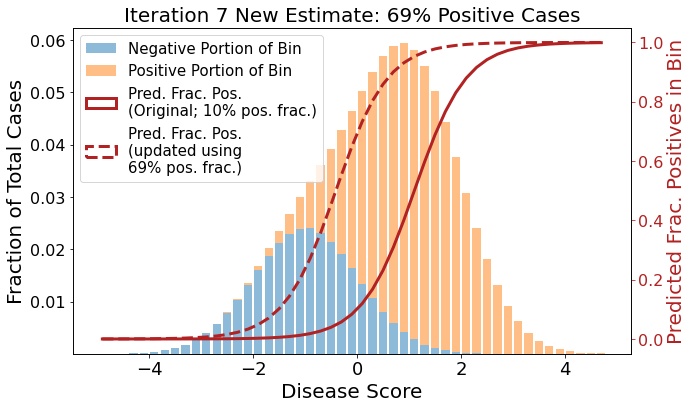

Iteraction 7 current posfrac: 0.6964581639152138


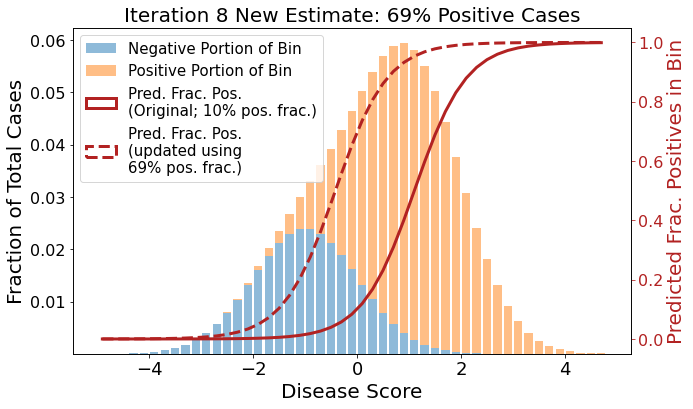

Iteraction 8 current posfrac: 0.6983155626365258


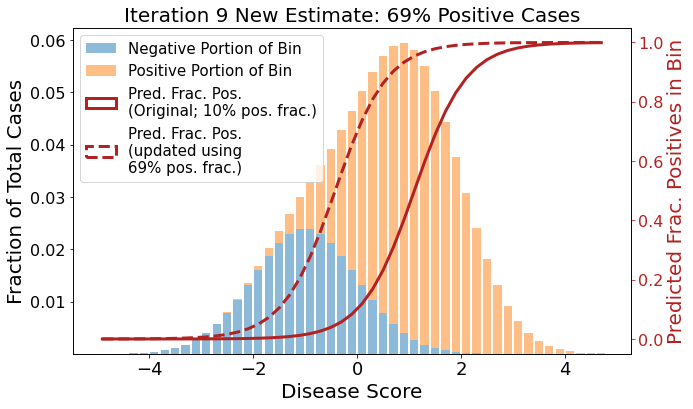

Iteraction 9 current posfrac: 0.699193640430724


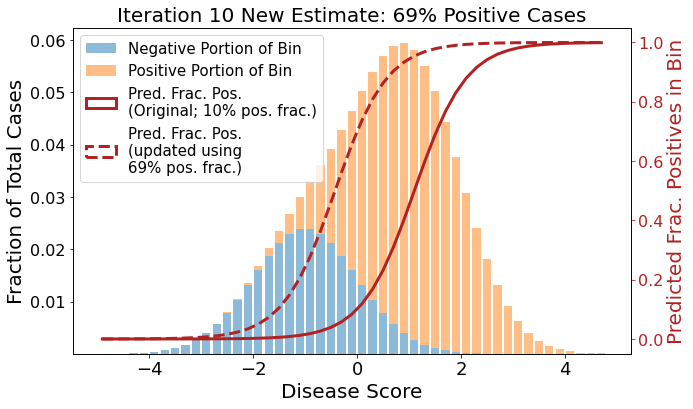

In [266]:
#Show the EM updates

ORIG_PREDPOSFRAC = orig_posprobs/(orig_posprobs + orig_negprobs)
LATE_PDF = late_negprobs + late_posprobs

def compute_predposfrac(current_posfrac):
  return ((ORIG_PREDPOSFRAC*(current_posfrac/ORIG_POS_FRAC))/
        (ORIG_PREDPOSFRAC*(current_posfrac/ORIG_POS_FRAC)
          + (1-ORIG_PREDPOSFRAC)*((1-current_posfrac)/(1-ORIG_POS_FRAC) )))


def display_ground_truth():
  #Display ground truth
  fig, ax1 = plt.subplots(figsize=(10,6))
  ax2 = ax1.twinx()
  groundtruth_predposfrac = compute_predposfrac(LATE_POS_FRAC)
  groundtruth_negpart_pdf = LATE_PDF*(1-groundtruth_predposfrac)
  groundtruth_pospart_pdf = LATE_PDF*groundtruth_predposfrac
  handles = []
  handles.append(barplot(ax1, midpoints, groundtruth_negpart_pdf))
  handles.append(barplot(ax1, midpoints, groundtruth_pospart_pdf,
                        bottom=groundtruth_negpart_pdf))
  handles.append(lineplot(ax2, midpoints, ORIG_PREDPOSFRAC, color=AX2_COLOR))
  handles.append(lineplot(ax2, midpoints, groundtruth_predposfrac,
                          color=AX2_COLOR, linestyle="--"))
  configure_ax1(ax1)
  configure_ax2(ax2)
  plt.legend(handles, ["Negative Portion of Bin",
                      "Positive Portion of Bin",
                      "Pred. Frac. Pos.\n(Original; 10% pos. frac.)",
                      "Pred. Frac. Pos.\n(updated using\n"+str(int(LATE_POS_FRAC*100))+"% pos. frac.)"],
            fontsize=LEGEND_FONTSIZE, loc=2)
  plt.title("Ground Truth Estimate: "
            +str(int(LATE_POS_FRAC*100))+"% Positive Cases",
            fontsize=TITLE_SIZE)
  plt.show()

display_ground_truth()

def do_em_update(current_posfrac, iteridx):
  fig, ax1 = plt.subplots(figsize=(10,6))
  ax2 = ax1.twinx()
  current_predposfrac = compute_predposfrac(current_posfrac)
  
  negpart_pdf = LATE_PDF*(1-current_predposfrac)
  pospart_pdf = LATE_PDF*current_predposfrac
  handles = []
  handles.append(barplot(ax1, midpoints, negpart_pdf))
  handles.append(barplot(ax1, midpoints, pospart_pdf, bottom=negpart_pdf))
  handles.append(lineplot(ax2, midpoints, ORIG_PREDPOSFRAC, color=AX2_COLOR))
  handles.append(lineplot(ax2, midpoints, current_predposfrac,
                          color=AX2_COLOR, linestyle="--"))
  configure_ax1(ax1)
  configure_ax2(ax2)
  plt.legend(handles, ["Negative Portion of Bin",
                       "Positive Portion of Bin",
                      "Pred. Frac. Pos.\n(Original; 10% pos. frac.)",
                      "Pred. Frac. Pos.\n(updated using\n"+str(int(current_posfrac*100))+"% pos. frac.)"],
            fontsize=LEGEND_FONTSIZE, loc=2)
  
  new_posfrac = np.sum(pospart_pdf)/(np.sum(pospart_pdf)+np.sum(negpart_pdf))

  plt.title("Iteration "+str(iteridx+1)+" New Estimate: "
             +str(int(new_posfrac*100))+"% Positive Cases",
             fontsize=TITLE_SIZE)
  plt.show()

  return new_posfrac

new_posfrac = ORIG_POS_FRAC
for i in range(10):
  print("Iteraction",i,"current posfrac:", new_posfrac)
  new_posfrac = do_em_update(new_posfrac, i)




In [161]:
#make boxplot results
#Download data first
!rm *.gz
!wget https://github.com/blindauth/labelshiftexperiments/raw/ec3388f/notebooks/cifar10_label_shift_adaptation_results.json.gz
!wget https://github.com/blindauth/labelshiftexperiments/raw/ec3388f/notebooks/cifar100_label_shift_adaptation_results.json.gz
!wget https://github.com/blindauth/labelshiftexperiments/raw/ec3388f/notebooks/mnist_label_shift_adaptation_results.json.gz
!wget https://github.com/blindauth/labelshiftexperiments/raw/ec3388f/notebooks/kaggledr_label_shift_adaptation_results.json.gz

--2020-06-05 15:05:13--  https://github.com/blindauth/labelshiftexperiments/raw/ec3388f/notebooks/cifar10_label_shift_adaptation_results.json.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/blindauth/labelshiftexperiments/ec3388f59d4e82a4268e6d09fb3712333d57231f/notebooks/cifar10_label_shift_adaptation_results.json.gz [following]
--2020-06-05 15:05:13--  https://raw.githubusercontent.com/blindauth/labelshiftexperiments/ec3388f59d4e82a4268e6d09fb3712333d57231f/notebooks/cifar10_label_shift_adaptation_results.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1480716 (1.4M) [application/oct

In [0]:
import gzip, json

cifar10_dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals =\
  json.loads(gzip.open(
      "cifar10_label_shift_adaptation_results.json.gz").read())[
       'dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals']
cifar100_dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals =\
  json.loads(gzip.open(
      "cifar100_label_shift_adaptation_results.json.gz").read())[
       'dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals']
mnist_dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals =\
  json.loads(gzip.open(
      "mnist_label_shift_adaptation_results.json.gz").read())[
       'dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals']
kaggledr_tweakone_alpha_to_samplesize_to_adaptername_to_metric_to_vals =\
  json.loads(gzip.open(
      "kaggledr_label_shift_adaptation_results.json.gz").read())[
       'tweakone_alpha_to_samplesize_to_adaptername_to_metric_to_vals']

mseweights_even


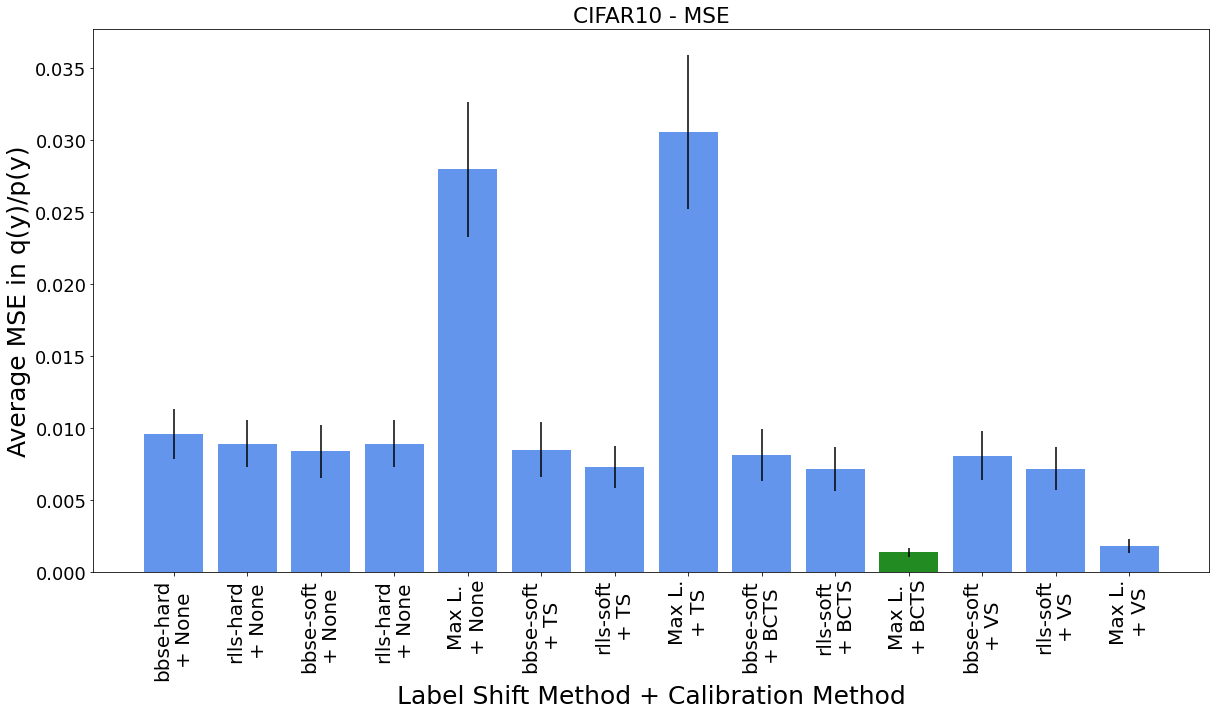

mseweights_even


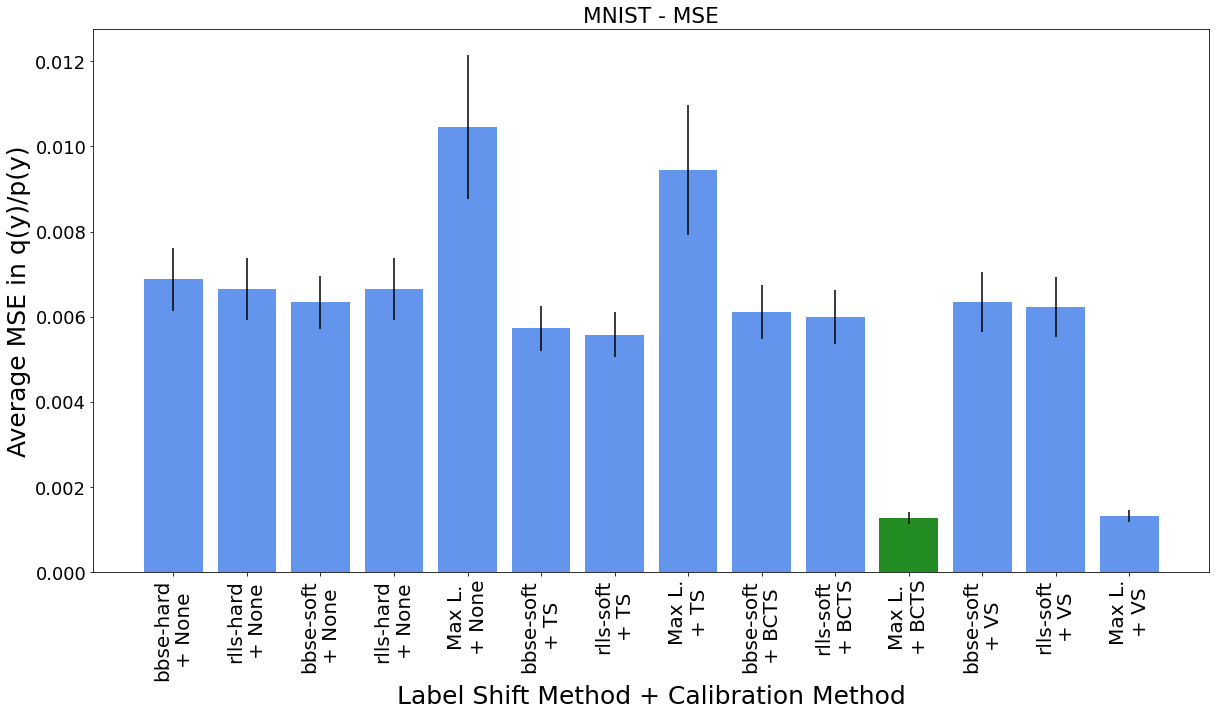

mseweights_even


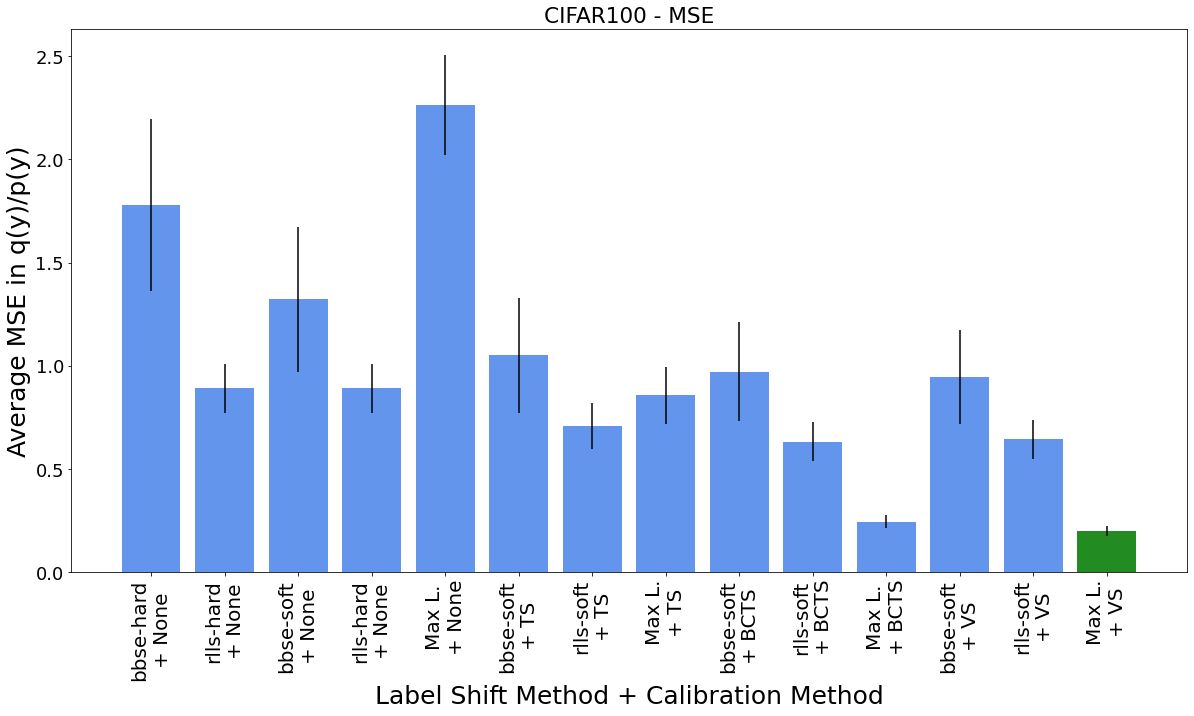

mseweights_even


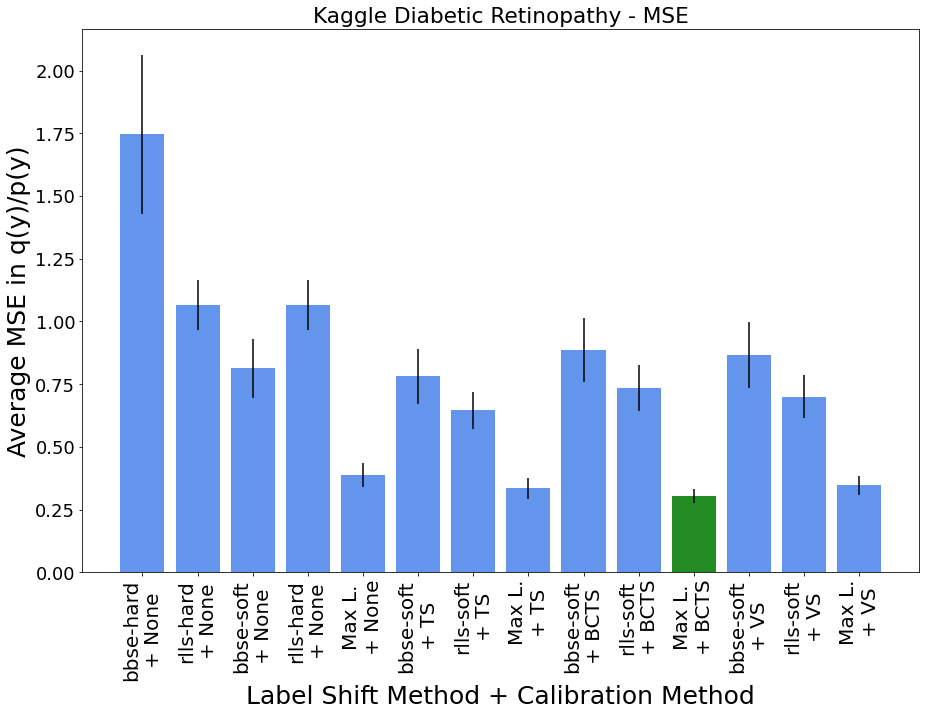

delta_perf


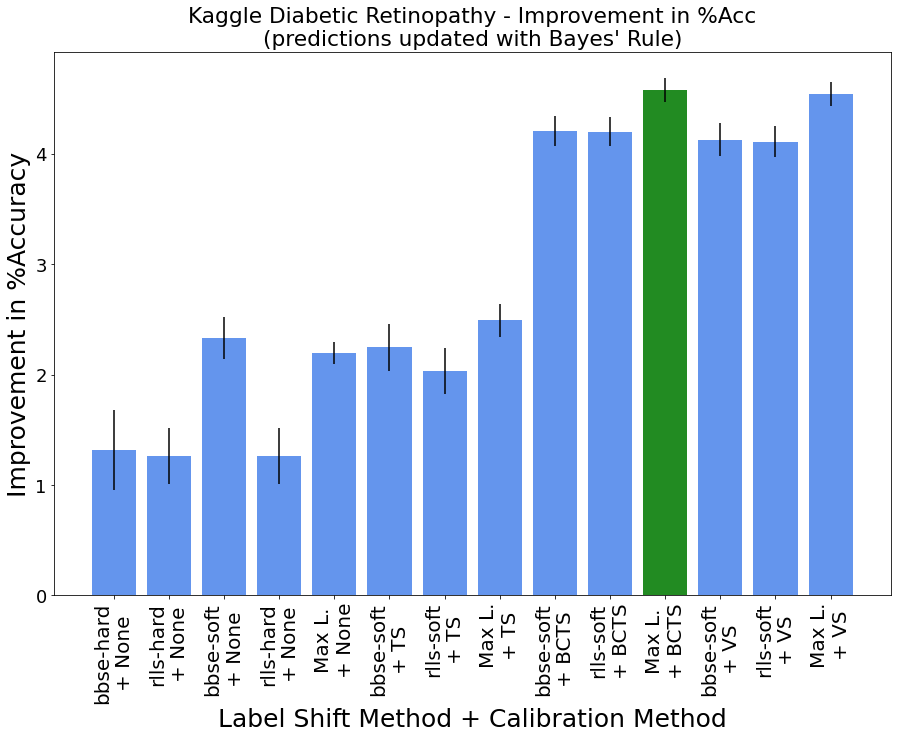

In [243]:
import scipy.stats
import numpy as np

adapternames = ['bbse-hard:None', 'rlls-hard:None',
                'bbse-soft:None', 'rlls-hard:None',
                'em:None',
                'bbse-soft:TS',
                'rlls-soft:TS',
                'em:TS',
                'bbse-soft:BCTS',
                'rlls-soft:BCTS',
                'em:BCTS',
                'bbse-soft:VS',
                'rlls-soft:VS',
                'em:VS']

method_to_nicename = {'bbse'}

def get_barplot_vals(thedict, paramval, n, methods, metric):
  print(metric)
  values = np.array([
      thedict[paramval][n][method][metric]
      for method in methods
  ])*(100 if metric=="delta_perf" else 1)
  avg = np.mean(values, axis=-1)
  stderr = scipy.stats.sem(values, axis=-1)
  return avg, stderr

def show_barplot(thedict, paramval, n, methods, metric, title, figsize=(20,10)):
  plt.figure(figsize=figsize)
  avg, stderr = get_barplot_vals(thedict, paramval, n, methods, metric)
  #ordering = np.argsort(avg)
  ordering = np.arange(len(methods))
  argbest = np.argmin(avg) if ("mse" in metric) else np.argmax(avg)
  plt.title(title)
  plt.bar(x=np.arange(len(methods)),
          height=avg[ordering],
          yerr=stderr[ordering],
          color=['cornflowerblue' if i!=argbest else 'forestgreen'
                 for i in range(len(methods))])
  plt.xticks(np.arange(len(methods)),
             [methods[i].replace(":","\n+ ").replace("empriorsfrompreds", "em").replace("em", "Max L.")
             for i in ordering],
             rotation='vertical',
             fontsize=20)
  plt.xlabel("Label Shift Method + Calibration Method", fontsize=25)
  plt.ylabel("Average MSE in q(y)/p(y)" if ("mse" in metric)
              else "Improvement in %Accuracy", fontsize=25)
  plt.show()

show_barplot(
    thedict=cifar10_dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals,
    paramval='0.1',
    n='2000',
    methods=adapternames,
    metric='mseweights_even',
    title="CIFAR10 - MSE"
)

show_barplot(
    thedict=mnist_dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals,
    paramval='0.1',
    n='2000',
    methods=adapternames,
    metric='mseweights_even',
    title="MNIST - MSE"
)

show_barplot(
    thedict=cifar100_dirichlet_alpha_to_samplesize_to_adaptername_to_metric_to_vals,
    paramval='0.1',
    n='7000',
    methods=adapternames,
    metric='mseweights_even',
    title="CIFAR100 - MSE"
)

show_barplot(
    thedict=kaggledr_tweakone_alpha_to_samplesize_to_adaptername_to_metric_to_vals,
    paramval='0.5',
    n='1500',
    methods=[x.replace("em:","empriorsfrompreds:") for x in adapternames],
    metric='mseweights_even',
    title="Kaggle Diabetic Retinopathy - MSE",
    figsize=(15,10)
)

show_barplot(
    thedict=kaggledr_tweakone_alpha_to_samplesize_to_adaptername_to_metric_to_vals,
    paramval='0.5',
    n='1500',
    methods=[x.replace("em:","empriorsfrompreds:") for x in adapternames],
    metric='delta_perf',
    title="Kaggle Diabetic Retinopathy - Improvement in %Acc\n(predictions updated with Bayes' Rule)",
    figsize=(15,10)
)